<a href="https://colab.research.google.com/github/s0ku00/DTS/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
'''
Import your data and perform basic data exploration phase
Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
Perform partitional clustering using the K-means algorithm. Then, plot the clusters
Find the best k value and plot the clusters again.
Interpret the results
'''

"\nImport you data and perform basic data exploration phase\nPerform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )\nPerform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')\nPerform partitional clustering using the K-means algorithm. Then, plot the clusters\nFind the best k value and plot the clusters again.\nInterpret the results\n"

In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Credit_card_dataset.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [8]:
# Installing pandas_profiling
!pip install pandas-profiling
from ydata_profiling import ProfileReport

In [9]:
# Create ydata_profiling Report
profile = ProfileReport(data, title='African Crisis Profiling Report')

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Dropping the 'CUST_ID' column
data = data.drop('CUST_ID', axis=1)

In [11]:
# Identify outliers using IQR
Q1 =data.quantile(0.25)
Q3 =data.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

# Remove outliers
data = data[~outliers.any(axis=1)]

In [12]:
features = data[['PURCHASES', 'CREDIT_LIMIT']].dropna()
features.head()

,PURCHASES,CREDIT_LIMIT
0,95.40,1000.0
2,773.17,7500.0
4,16.00,1200.0
5,1333.28,1800.0
7,436.20,2300.0


In [13]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [14]:
# Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
model=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
clust_labels=model.fit_predict(features)
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,3
1,0
2,3
3,3
4,4
...,...
5615,4
5616,3
5617,3
5618,3


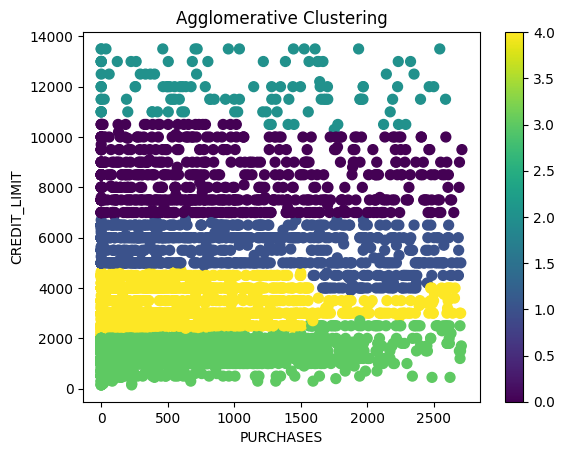

In [19]:
# Plotting the clusters
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (features ['PURCHASES'] , features ["CREDIT_LIMIT"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("CREDIT_LIMIT")
plt.colorbar(scatter)

In [30]:
# Assuming the optimal number of clusters is 4
k_optimal = 4

# Perform K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

'''
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
'''
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(features)

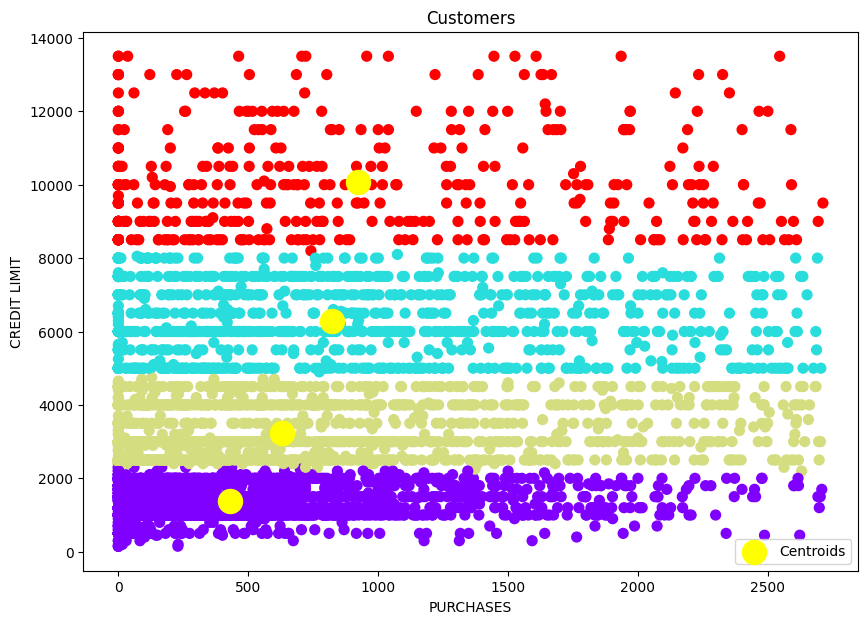

In [32]:
# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=cluster_labels, cmap='rainbow', s=50)
plt.title('Customers')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT LIMIT')

# Plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')
plt.legend()
plt.show()


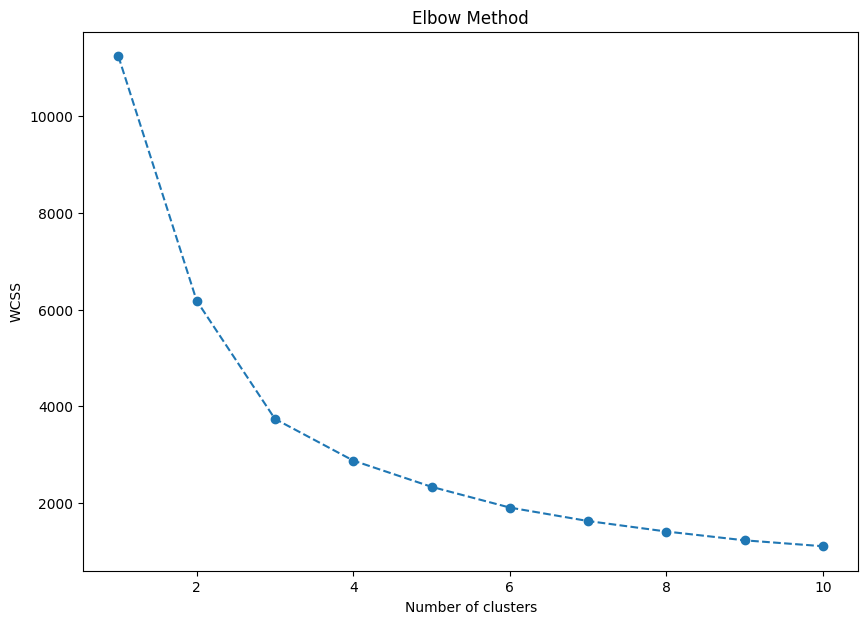

In [20]:
# Use the Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

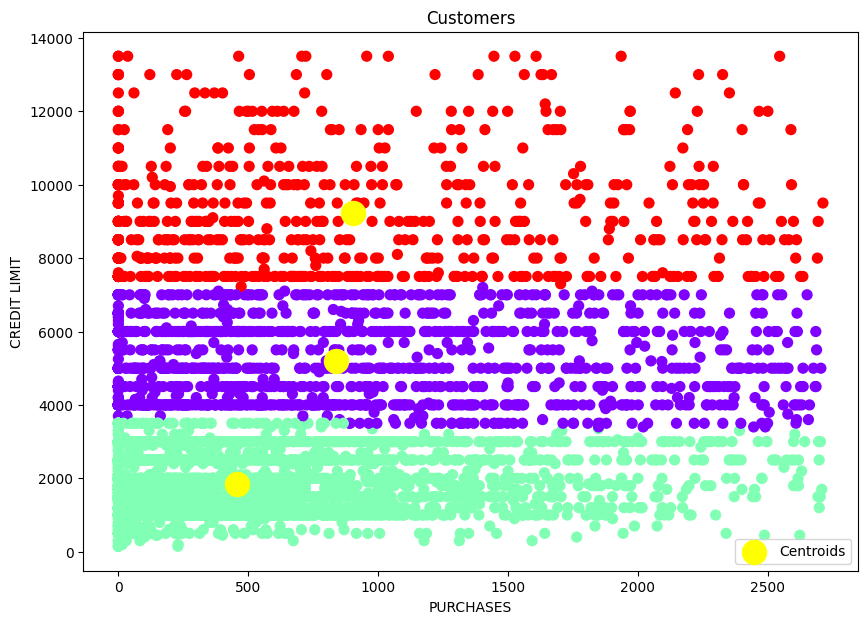

In [33]:
# Using the optimal number of clusters = 3
k_optimal = 3

kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=500, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=cluster_labels, cmap='rainbow', s=50)
plt.title('Customers')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT LIMIT')

# Plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')
plt.legend()
plt.show()